<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a webpage

Download the webpage at the url


In [4]:
data  = requests.get(url).text

Create a soup object


In [5]:
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data

Scrape the `Language name` and `annual average salary`.


In [9]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>


Save the scrapped data into a file named *popular-languages.csv*


In [30]:
import pandas as pd

data = []

for row in table.find_all('tr'):
    # Extraer todas las celdas <td> o <th>
    cols = row.find_all(['td', 'th'])
    # Obtener el texto de cada celda
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# Convertir a DataFrame
df = pd.DataFrame(data[1:], columns=data[0])  # Primera fila como header
# Filtrar solo las columnas que nos interesan
df_filtered = df[['Language', 'Average Annual Salary']]

# Guardar en CSV
df_filtered.to_csv("popular-languages.csv", index=False)

print("Archivo 'languages_salaries.csv' guardado correctamente.")

Archivo 'languages_salaries.csv' guardado correctamente.


In [36]:
# Crear copia para no modificar el original
df_plot = df_filtered.copy()
# Eliminar $ y comas, luego convertir a float
df_plot['Average Annual Salary'] = (
    df_plot['Average Annual Salary']
    .str.replace('$', '', regex=False)  # quitar $
    .str.replace(',', '', regex=False)  # quitar comas si existen
    .astype(int)                       # convertir a float
)


,Language,Average Annual Salary
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


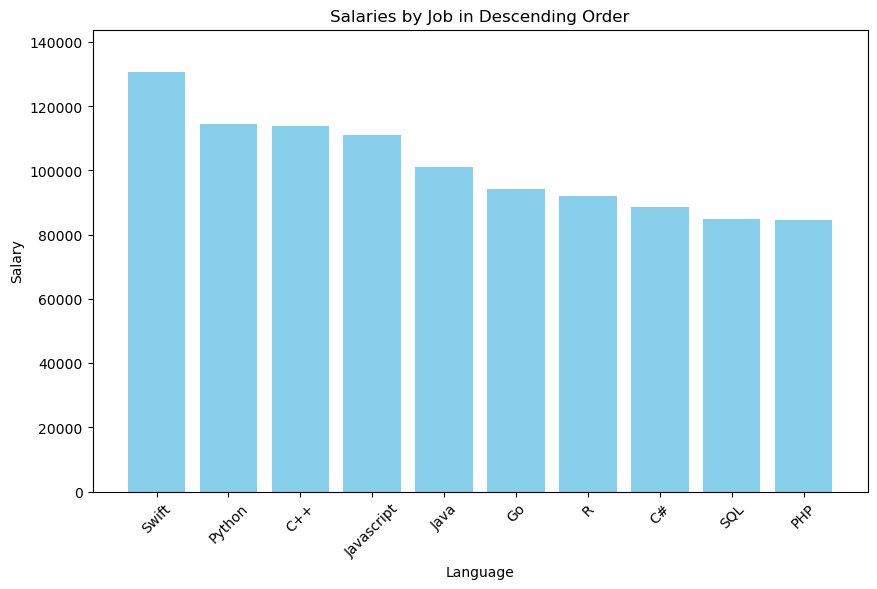

In [37]:
import matplotlib.pyplot as plt
df_sorted = df_plot.sort_values(by='Average Annual Salary', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(df_sorted['Language'], df_sorted['Average Annual Salary'], color='skyblue')
plt.xlabel('Language')
plt.ylabel('Salary')
plt.title('Salaries by Job in Descending Order')
plt.xticks(rotation=45)
# Forzar eje Y desde 0 hasta un poco más del máximo para que se vea mejor
ax = plt.gca()
ax.set_ylim(0, df_sorted['Average Annual Salary'].max() * 1.1)  # 10% de margen arriba

plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
